In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install statsmodels
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5-years-vietnamese-stock-data/stock_data_raw1 - stock_data_raw1.csv
/kaggle/input/5-years-vietnamese-stock-data/stock_data_raw1 - Sheet1.csv


In [2]:
df = pd.read_csv("/kaggle/input/5-years-vietnamese-stock-data/stock_data_raw1 - Sheet1.csv")
df.head(10)

,ticker,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice,Label,symbol,en_icb_name3
0,HTI,2023,2,2023-06-30,0.2903,0.8991,7.2384,0.0979,0.4354,0.1335,0.1239,0.0376,593.1495,2.2770,15.26,0.06193,Good,HTI,Construction & Materials
1,HTI,2023,1,2023-03-31,0.0000,0.9074,7.5228,0.0955,0.4665,0.1310,0.0000,0.0000,554.0819,0.0000,14.37,0.02863,Good,HTI,Construction & Materials
2,HTI,2022,4,2022-12-29,0.0000,0.9383,7.5819,0.1071,0.4182,0.1248,0.0000,0.0000,558.5430,0.0000,13.97,0.05514,Good,HTI,Construction & Materials
3,HTI,2022,1,2022-03-31,0.2153,0.9121,12.2930,0.1034,0.4842,0.1346,0.0759,0.0225,543.3124,2.2533,14.72,0.04993,Good,HTI,Construction & Materials
4,HTI,2021,3,2021-09-29,0.2025,1.0385,14.4385,0.1087,0.5885,-0.6981,0.0690,0.0197,-526.9592,2.5745,14.05,0.13765,Good,HTI,Construction & Materials
5,HTI,2021,1,2021-03-31,0.2291,0.8050,6.2588,0.1325,0.5450,0.1487,0.1293,0.0360,578.2512,2.4602,13.29,0.35751,Good,HTI,Construction & Materials
6,HTI,2020,4,2020-12-29,0.2198,0.9214,6.8951,0.1194,0.4924,0.1571,0.1328,0.0355,639.4912,2.6564,9.79,0.24396,Good,HTI,Construction & Materials
7,HTI,2020,3,2020-09-29,0.2162,0.8954,6.6793,0.0843,0.5451,0.1560,0.1324,0.0360,597.7903,2.6352,7.87,0.04377,Good,HTI,Construction & Materials
8,HTI,2020,2,2020-06-30,0.2144,0.6347,4.6924,0.1152,0.5735,0.1681,0.1377,0.0372,597.0585,2.6116,7.54,0.23810,Good,HTI,Construction & Materials
9,HTI,2019,4,2019-12-27,0.2165,0.5870,3.8552,0.0000,0.5059,0.1753,0.1533,0.0399,695.5114,2.8237,6.54,0.04808,Good,HTI,Construction & Materials


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   4535 non-null   object 
 1   yearReport               4535 non-null   int64  
 2   lengthReport             4535 non-null   int64  
 3   time                     4535 non-null   object 
 4   Asset Turnover           4535 non-null   float64
 5   P/B                      4535 non-null   float64
 6   P/E                      4535 non-null   float64
 7   Dividend yield (%)       4535 non-null   float64
 8   Gross Profit Margin (%)  4535 non-null   float64
 9   Net Profit Margin (%)    4535 non-null   float64
 10  ROE (%)                  4535 non-null   float64
 11  ROA (%)                  4535 non-null   float64
 12  EPS (VND)                4535 non-null   float64
 13  Debt/Equity              4535 non-null   float64
 14  close                   

In [4]:
df['time']=pd.to_datetime(df['time'])
df.head()

,ticker,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice,Label,symbol,en_icb_name3
0,HTI,2023,2,2023-06-30,0.2903,0.8991,7.2384,0.0979,0.4354,0.1335,0.1239,0.0376,593.1495,2.2770,15.26,0.06193,Good,HTI,Construction & Materials
1,HTI,2023,1,2023-03-31,0.0000,0.9074,7.5228,0.0955,0.4665,0.1310,0.0000,0.0000,554.0819,0.0000,14.37,0.02863,Good,HTI,Construction & Materials
2,HTI,2022,4,2022-12-29,0.0000,0.9383,7.5819,0.1071,0.4182,0.1248,0.0000,0.0000,558.5430,0.0000,13.97,0.05514,Good,HTI,Construction & Materials
3,HTI,2022,1,2022-03-31,0.2153,0.9121,12.2930,0.1034,0.4842,0.1346,0.0759,0.0225,543.3124,2.2533,14.72,0.04993,Good,HTI,Construction & Materials
4,HTI,2021,3,2021-09-29,0.2025,1.0385,14.4385,0.1087,0.5885,-0.6981,0.0690,0.0197,-526.9592,2.5745,14.05,0.13765,Good,HTI,Construction & Materials


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticker                   4535 non-null   object        
 1   yearReport               4535 non-null   int64         
 2   lengthReport             4535 non-null   int64         
 3   time                     4535 non-null   datetime64[ns]
 4   Asset Turnover           4535 non-null   float64       
 5   P/B                      4535 non-null   float64       
 6   P/E                      4535 non-null   float64       
 7   Dividend yield (%)       4535 non-null   float64       
 8   Gross Profit Margin (%)  4535 non-null   float64       
 9   Net Profit Margin (%)    4535 non-null   float64       
 10  ROE (%)                  4535 non-null   float64       
 11  ROA (%)                  4535 non-null   float64       
 12  EPS (VND)                4535 non-

In [6]:
df.describe()

,yearReport,lengthReport,time,Asset Turnover,P/B,P/E,Dividend yield (%),Gross Profit Margin (%),Net Profit Margin (%),ROE (%),ROA (%),EPS (VND),Debt/Equity,close,QuarterPrice
count,4535.000000,4535.000000,4535,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,2021.102977,2.579493,2021-09-27 20:27:53.384785152,1.022476,1.433026,30.264938,0.070121,0.195408,0.154739,0.075796,0.054948,535.301303,1.322965,18.670673,0.070010
min,2019.000000,1.000000,2019-06-28 00:00:00,-0.143300,0.000000,-21844.720700,0.000000,-20.606700,-149.811100,-54.706500,-0.869300,-8572.099300,-420.486900,0.200000,-0.970150
25%,2020.000000,2.000000,2020-06-30 00:00:00,0.283500,0.694950,5.901250,0.000000,0.081550,0.009400,0.026100,0.010500,46.298850,0.355800,7.585000,-0.076250
50%,2021.000000,3.000000,2021-09-29 00:00:00,0.760300,1.098300,9.879700,0.030600,0.167100,0.049500,0.091000,0.043700,300.455200,0.869900,12.870000,0.024820
75%,2022.000000,4.000000,2022-12-29 00:00:00,1.321750,1.710150,18.423900,0.065300,0.310450,0.148100,0.169550,0.088800,826.578850,1.702000,23.410000,0.161375
max,2023.000000,4.000000,2023-12-29 00:00:00,14.993800,60.007300,24867.867200,9.000000,3.191800,181.674600,0.772200,0.615800,22940.807100,162.307900,288.200000,6.500000
std,1.370889,1.090430,NaN,1.186133,1.709672,569.048286,0.476538,0.480308,5.498547,0.863968,0.080254,1069.723258,7.664389,18.487029,0.315827


<Axes: xlabel='Label', ylabel='count'>

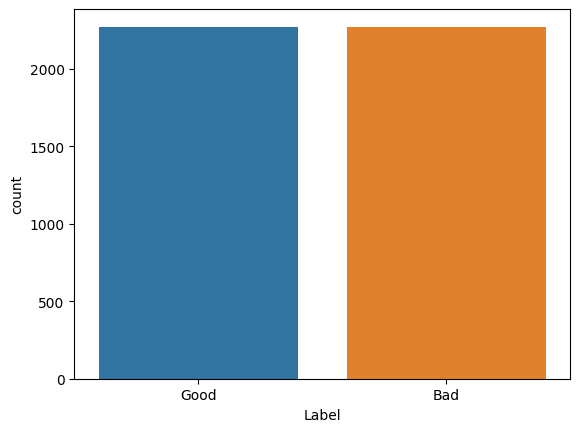

In [7]:
sns.countplot(x=df['Label'])

<Axes: xlabel='yearReport', ylabel='count'>

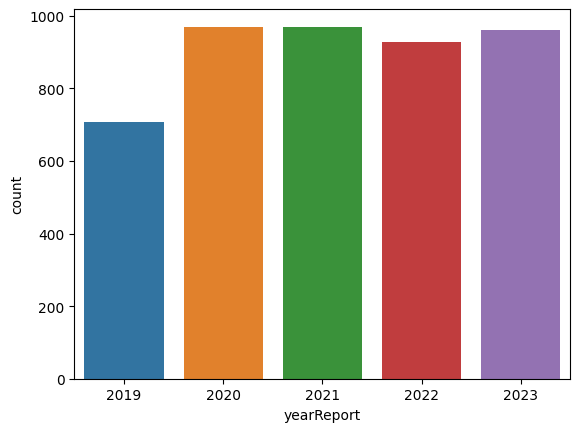

In [8]:
sns.countplot(x=df['yearReport'])

<Axes: xlabel='count', ylabel='en_icb_name3'>

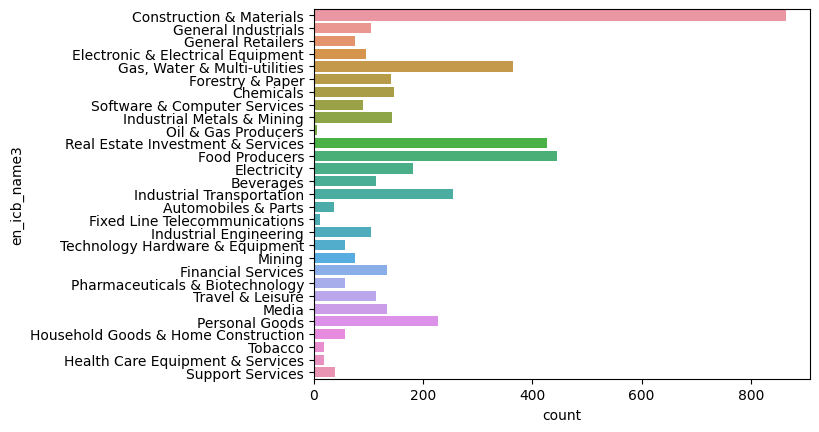

In [9]:
sns.countplot(y=df['en_icb_name3'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Asset Turnover', ylabel='Count'>

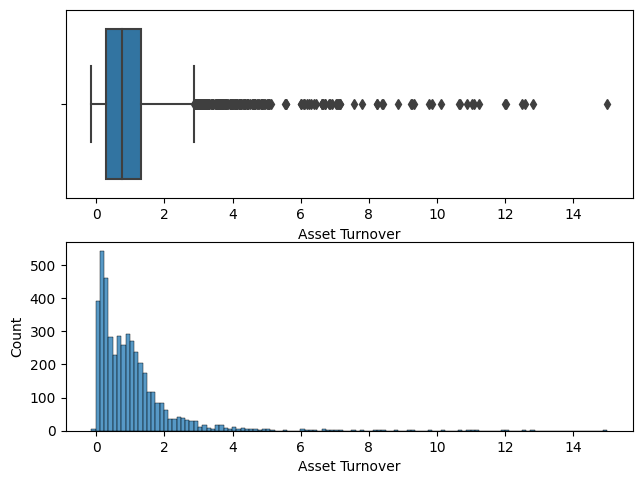

In [10]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Asset Turnover'],ax = axes[0])
sns.histplot(x=df['Asset Turnover'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/B', ylabel='Count'>

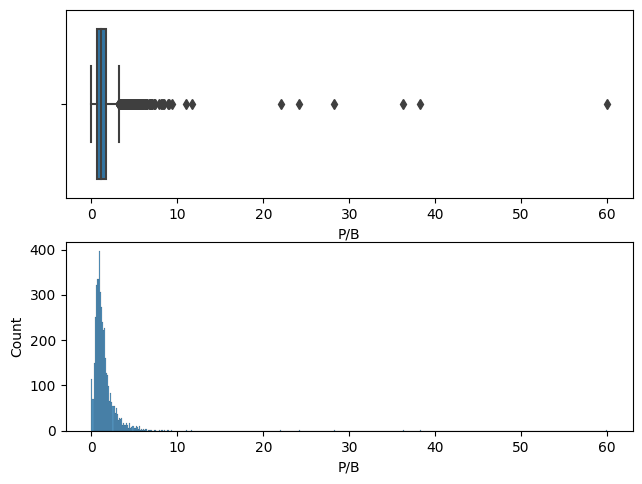

In [11]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/B'],ax = axes[0])
sns.histplot(x=df['P/B'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/E', ylabel='Count'>

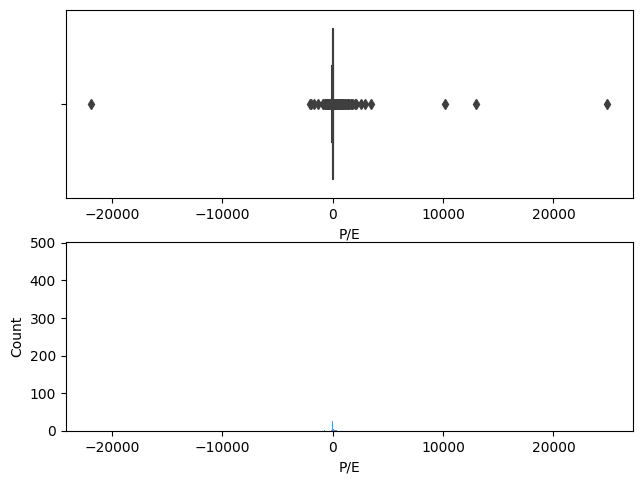

In [12]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/E'],ax = axes[0])
sns.histplot(x=df['P/E'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Dividend yield (%)', ylabel='Count'>

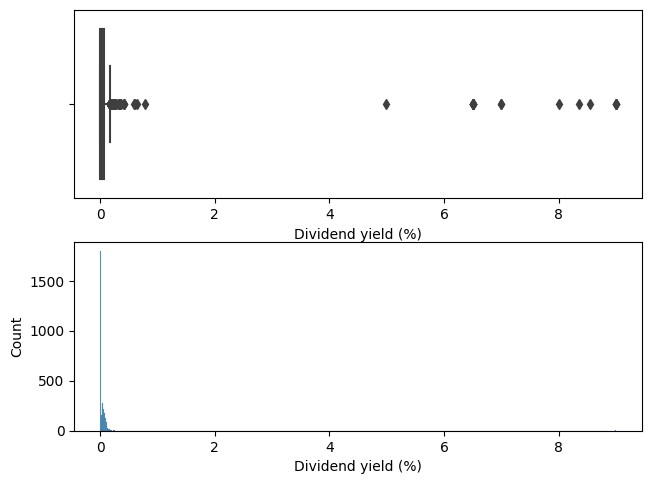

In [13]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Dividend yield (%)'],ax = axes[0])
sns.histplot(x=df['Dividend yield (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gross Profit Margin (%)', ylabel='Count'>

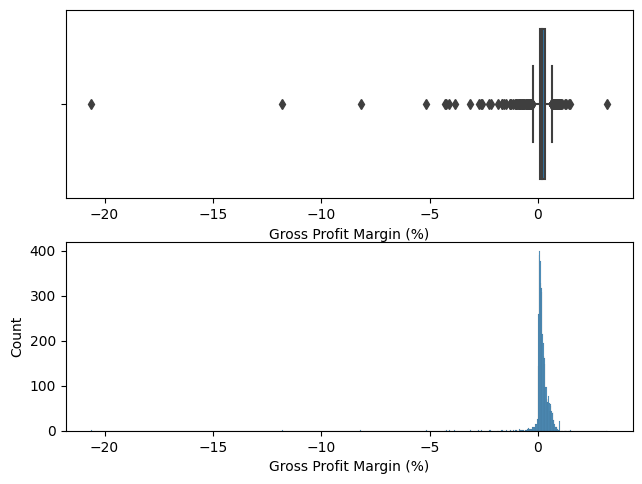

In [14]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Gross Profit Margin (%)'],ax = axes[0])
sns.histplot(x=df['Gross Profit Margin (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Net Profit Margin (%)', ylabel='Count'>

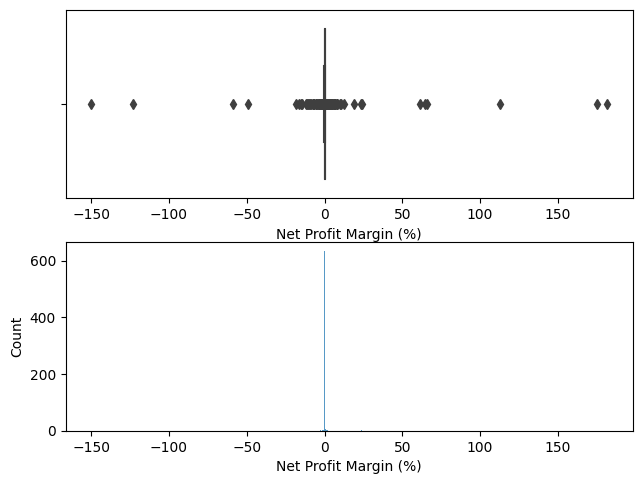

In [15]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Net Profit Margin (%)'],ax = axes[0])
sns.histplot(x=df['Net Profit Margin (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ROE (%)', ylabel='Count'>

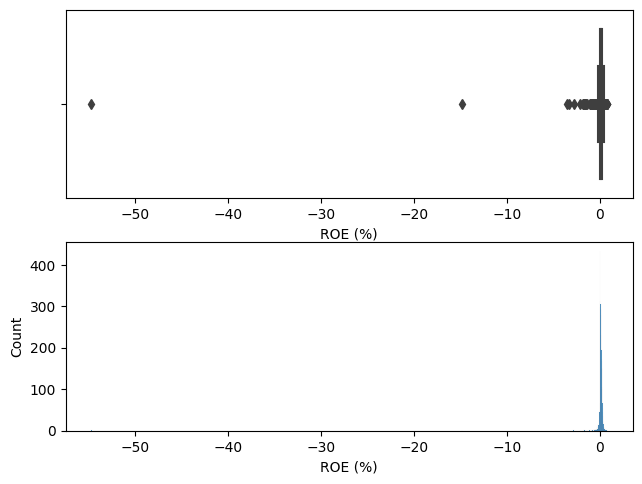

In [16]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['ROE (%)'],ax = axes[0])
sns.histplot(x=df['ROE (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ROA (%)', ylabel='Count'>

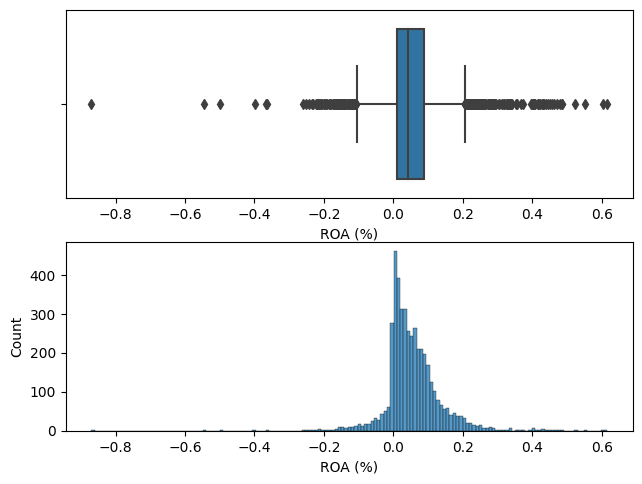

In [17]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['ROA (%)'],ax = axes[0])
sns.histplot(x=df['ROA (%)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P/E', ylabel='Count'>

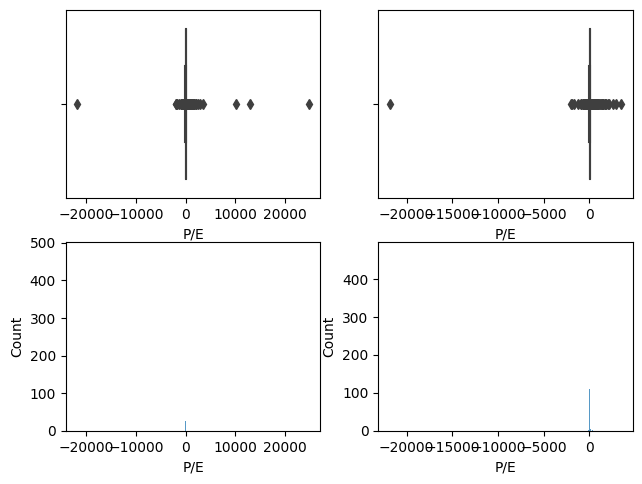

In [18]:
fig, axes = plt.subplots(2,2)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['P/E'],ax = axes[0,0])
sns.boxplot(x=df[df['P/E'] < 5000]['P/E'],ax = axes[0,1])
sns.histplot(x=df['P/E'],ax = axes[1,0])
sns.histplot(x=df[df['P/E'] < 5000]['P/E'],ax = axes[1,1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EPS (VND)', ylabel='Count'>

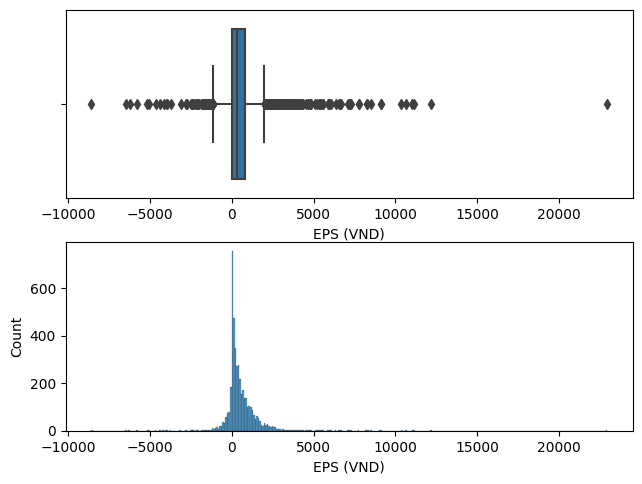

In [19]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['EPS (VND)'],ax = axes[0])
sns.histplot(x=df['EPS (VND)'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Debt/Equity', ylabel='Count'>

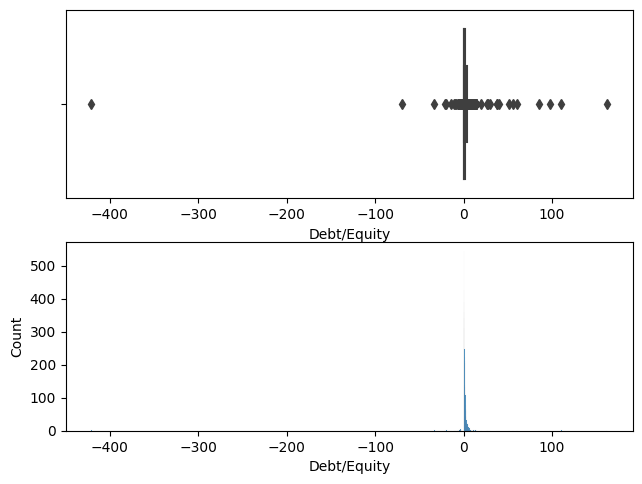

In [20]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['Debt/Equity'],ax = axes[0])
sns.histplot(x=df['Debt/Equity'],ax = axes[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='QuarterPrice', ylabel='Count'>

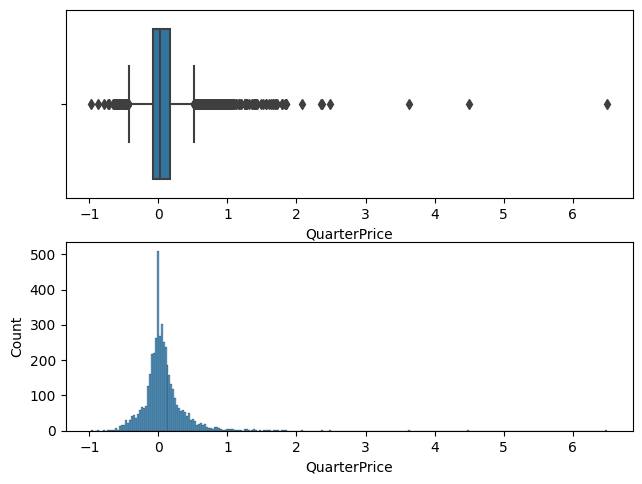

In [21]:
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=df['QuarterPrice'],ax = axes[0])
sns.histplot(x=df['QuarterPrice'],ax = axes[1])

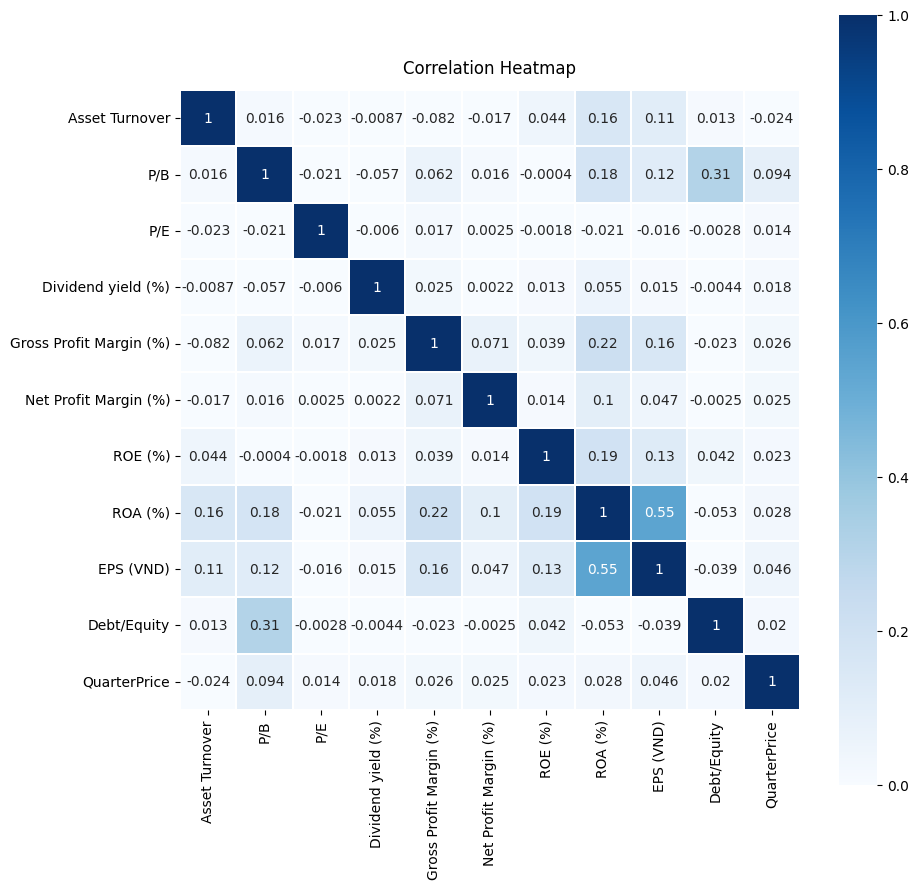

In [22]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.loc[:,'Asset Turnover':'QuarterPrice'].drop(columns=['close']).corr(),linewidths=0.1,vmax=1.0,vmin=0, 
            square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='QuarterPrice', ylabel='ROA (%)'>

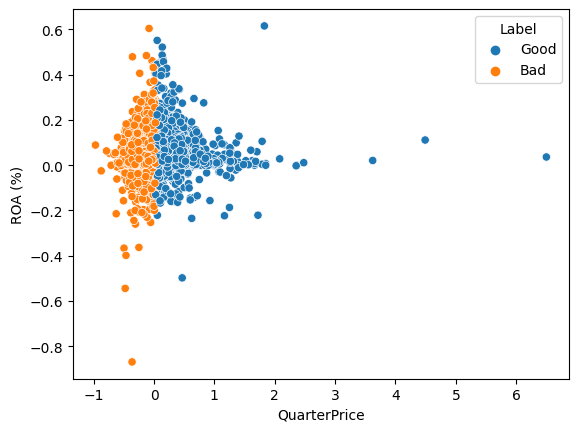

In [23]:
sns.scatterplot(x=df['QuarterPrice'],y=df['ROA (%)'] , hue=df['Label'])

In [24]:
from scipy import stats
stats.spearmanr(df['QuarterPrice'],df['ROA (%)'])

SignificanceResult(statistic=0.08879883166018461, pvalue=2.0969325171812073e-09)

<Axes: xlabel='QuarterPrice', ylabel='EPS (VND)'>

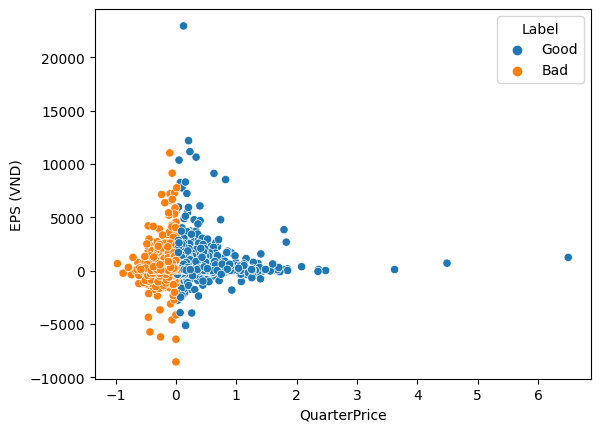

In [25]:
sns.scatterplot(x=df['QuarterPrice'],y=df["EPS (VND)"] , hue=df['Label'])

In [26]:
stats.spearmanr(df['QuarterPrice'],df["EPS (VND)"])

SignificanceResult(statistic=0.10736314890566387, pvalue=4.1967183022420674e-13)

<Axes: xlabel='P/B', ylabel='Debt/Equity'>

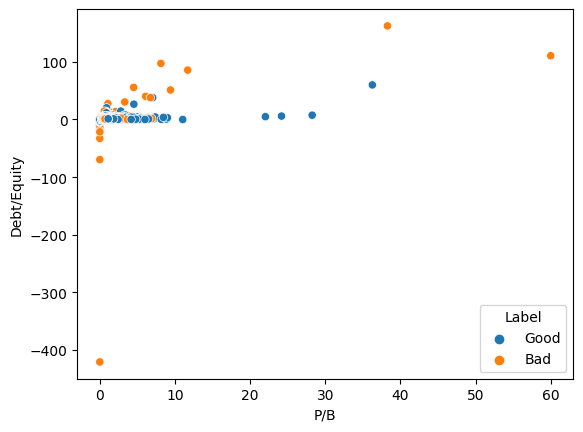

In [27]:
sns.scatterplot(x=df['P/B'],y=df['Debt/Equity'], hue=df['Label'])

In [28]:
stats.spearmanr(df['P/B'],df['Debt/Equity'])

SignificanceResult(statistic=0.026791297092129383, pvalue=0.07122865608491423)

<Axes: xlabel='ROA (%)', ylabel='EPS (VND)'>

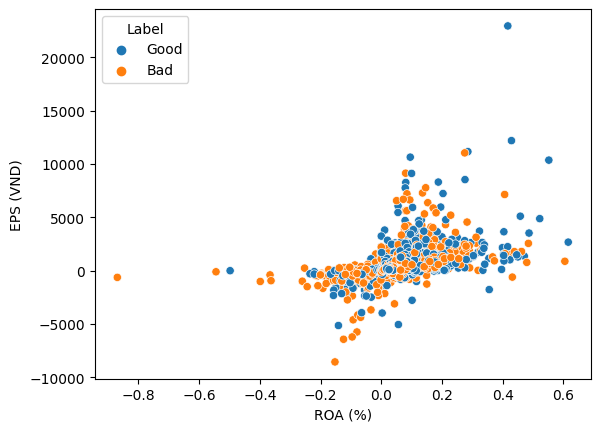

In [29]:
sns.scatterplot(x=df['ROA (%)'],y=df['EPS (VND)'], hue=df['Label'])

In [30]:
stats.spearmanr(df['ROA (%)'],df['EPS (VND)'])

SignificanceResult(statistic=0.7376443460406369, pvalue=0.0)

<Axes: xlabel='ROA (%)', ylabel='Gross Profit Margin (%)'>

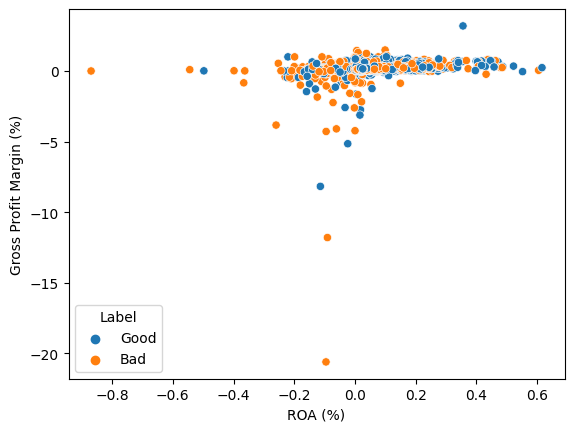

In [31]:
sns.scatterplot(x=df['ROA (%)'],y=df['Gross Profit Margin (%)'], hue=df['Label'])

In [32]:
stats.spearmanr(df['ROA (%)'],df['Gross Profit Margin (%)'])

SignificanceResult(statistic=0.4325762396524922, pvalue=3.232215562995959e-206)

<Axes: xlabel='EPS (VND)', ylabel='Gross Profit Margin (%)'>

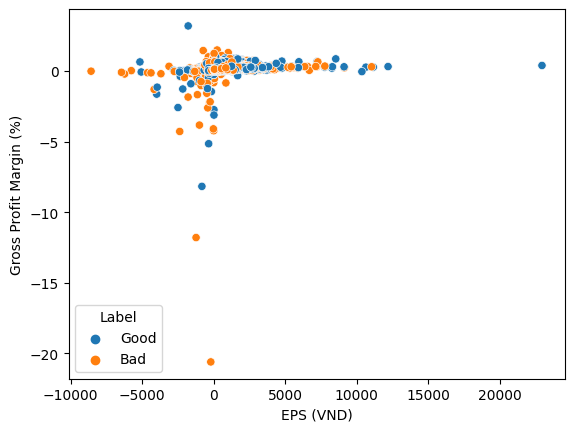

In [33]:
sns.scatterplot(x=df['EPS (VND)'],y=df['Gross Profit Margin (%)'], hue=df['Label'])

In [34]:
stats.spearmanr(df['EPS (VND)'],df['Gross Profit Margin (%)'])

SignificanceResult(statistic=0.41133127968569555, pvalue=1.0130858516329946e-184)

<Axes: xlabel='ROE (%)', ylabel='ROA (%)'>

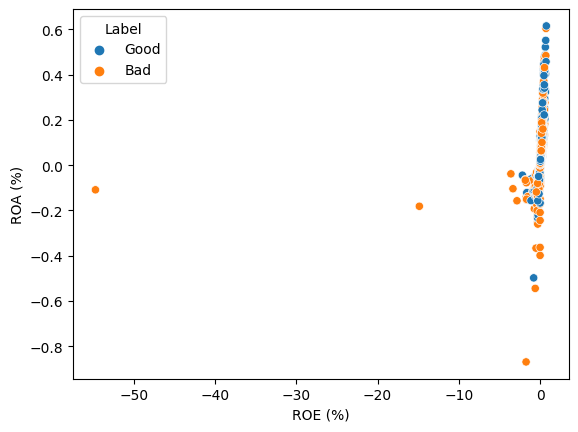

In [35]:
sns.scatterplot(x=df['ROE (%)'],y=df['ROA (%)'], hue=df['Label'])

In [36]:
stats.spearmanr(df['ROE (%)'],df['ROA (%)'])

SignificanceResult(statistic=0.9323616896126968, pvalue=0.0)

<Axes: xlabel='ROE (%)', ylabel='EPS (VND)'>

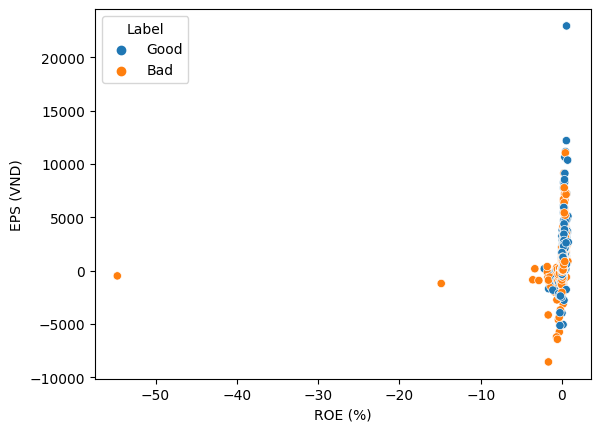

In [37]:
sns.scatterplot(x=df['ROE (%)'],y=df['EPS (VND)'], hue=df['Label'])

In [38]:
stats.spearmanr(df['ROE (%)'],df['EPS (VND)'])

SignificanceResult(statistic=0.7697611075111898, pvalue=0.0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler, normalize
X = df.loc[:,'Asset Turnover':'Debt/Equity']
y = df[['Label']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [40]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5635562086700955
0.5883361921097771
0.4921090387374462
0.5359375000000001


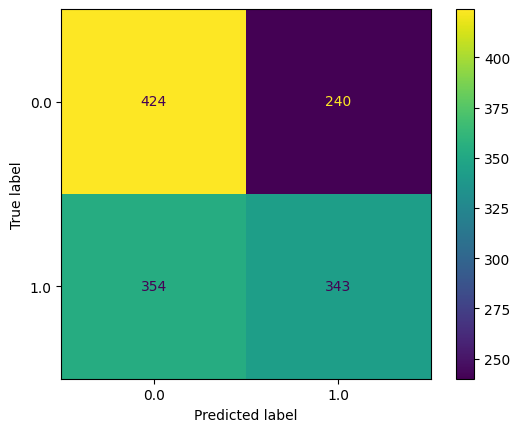

In [42]:
cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [43]:
RS = RobustScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = RS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [44]:
y_pred = clf1.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5635562086700955
0.5883361921097771
0.4921090387374462
0.5359375000000001


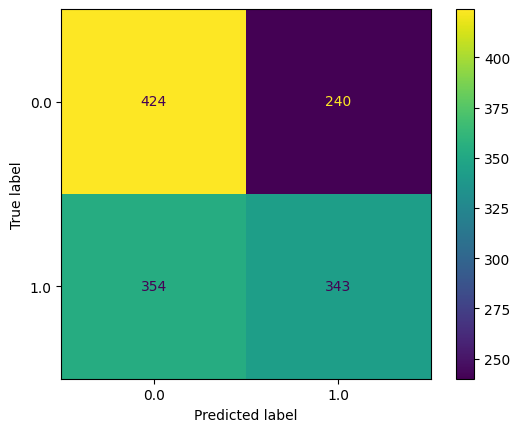

In [45]:
cm = confusion_matrix(y_test,y_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf1.classes_)
disp.plot()
plt.show()

In [46]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
y_pred = clf2.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5664952240999265
0.5519125683060109
0.6066066066066066
0.5779685264663805


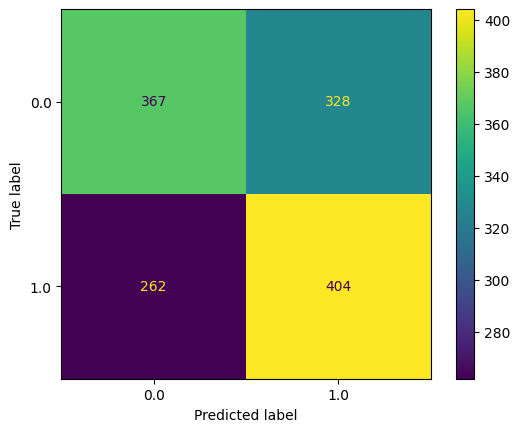

In [48]:
cm = confusion_matrix(y_test,y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf2.classes_)
disp.plot()
plt.show()

In [49]:
X = df.loc[:,'Asset Turnover':'Debt/Equity']
normalize(X, norm="l1")
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
y_pred = clf.predict(X_test) 
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
y_pred = clf3.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5635562086700955
0.5883361921097771
0.4921090387374462
0.5359375000000001


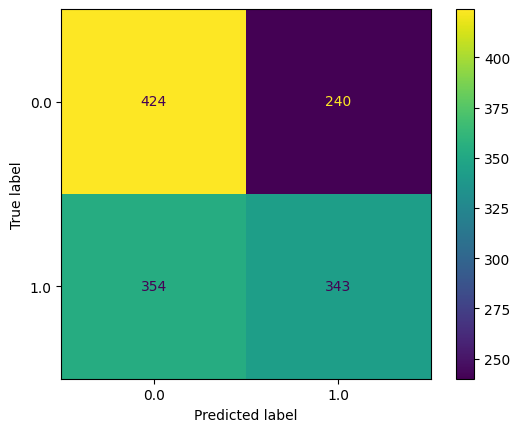

In [51]:
cm = confusion_matrix(y_test,y_pred, labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf3.classes_)
disp.plot()
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [53]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, n_jobs = 4) 
grid_search.fit(X_train, y_train.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


In [54]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [55]:
clf4 = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50,  random_state=0)
clf4.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50, random_state=0)

In [56]:
y_pred = clf4.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5753122703894196
0.5770862800565771
0.5938864628820961
0.5853658536585367


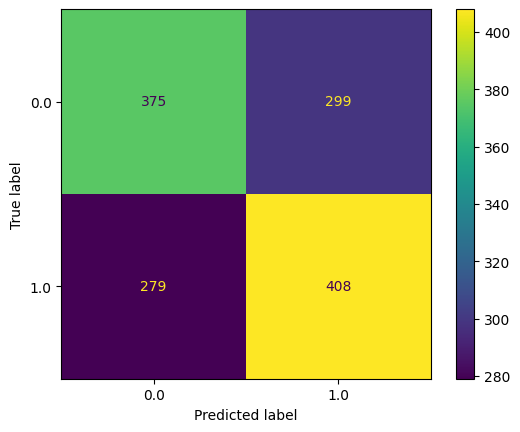

In [57]:
cm = confusion_matrix(y_test,y_pred, labels=clf4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf4.classes_)
disp.plot()
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
clf5.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [59]:
y_pred = clf5.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5723732549595886
0.5661971830985916
0.5946745562130178
0.58008658008658


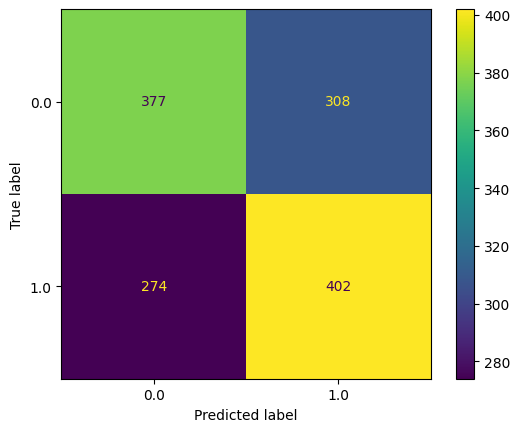

In [60]:
cm = confusion_matrix(y_test,y_pred, labels=clf5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf5.classes_)
disp.plot()
plt.show()

In [61]:
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf6 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf6.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [62]:
y_pred = clf6.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5598824393828068
0.5611111111111111
0.5880640465793304
0.574271499644634


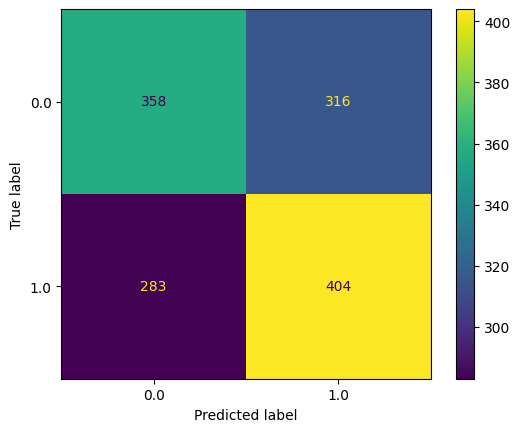

In [63]:
cm = confusion_matrix(y_test,y_pred, labels=clf6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf6.classes_)
disp.plot()
plt.show()

In [64]:
from sklearn.svm import SVC
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf7 = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0)
clf7.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


BaggingClassifier(estimator=SVC(), random_state=0)

In [65]:
y_pred = clf7.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5429831006612784
0.5354330708661418
0.5097451274362819
0.522273425499232


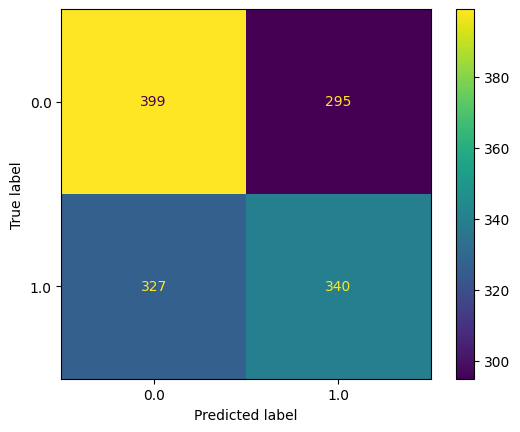

In [66]:
cm = confusion_matrix(y_test,y_pred, labels=clf7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf7.classes_)
disp.plot()
plt.show()

In [67]:
from sklearn.ensemble import StackingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
estimators = [
    ('bag', BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0)),
    ('ada', AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0))
]
clf8 = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50,  random_state=0)
)  
clf8.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


StackingClassifier(estimators=[('bag',
                                BaggingClassifier(estimator=SVC(),
                                                  random_state=0)),
                               ('ada',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   n_estimators=100,
                                                   random_state=0)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           random_state=0))],
                   final_estimator=RandomForestClassifier(max_depth=6,
                                                          max_features='log2',
                                                          max_leaf_nodes=9,
                                                          n_estimators=50,
                                                          random_state=0))

In [68]:
y_pred = clf8.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5804555473916239
0.5767441860465117
0.5552238805970149
0.5657794676806084


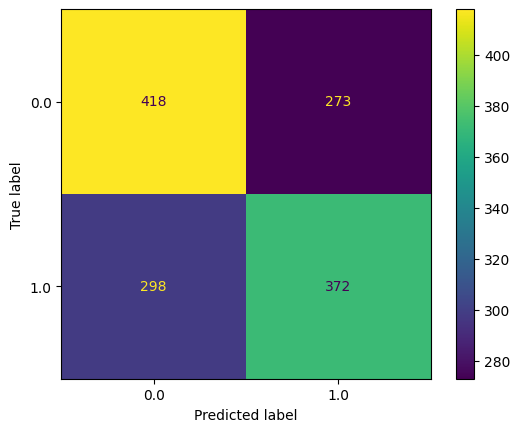

In [69]:
cm = confusion_matrix(y_test,y_pred, labels=clf8.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf8.classes_)
disp.plot()
plt.show()

In [70]:
from sklearn.neural_network import MLPClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
clf9 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 50), max_iter=10000, random_state=0)
clf9.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), max_iter=10000,
              random_state=0, solver='lbfgs')

In [71]:
y_pred = clf9.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5694342395297576
0.5721476510067114
0.5074404761904762
0.5378548895899053


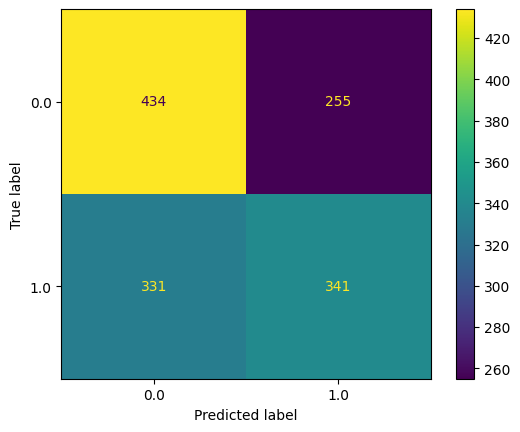

In [72]:
cm = confusion_matrix(y_test,y_pred, labels=clf9.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf9.classes_)
disp.plot()
plt.show()

In [73]:
from sklearn.ensemble import VotingClassifier
SS = StandardScaler().fit(X)
X = df.loc[:,'Asset Turnover':'Debt/Equity']
X = SS.transform(X)
y = df[['Label']]
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
eclf1 = VotingClassifier(estimators=[
        ('lr', clf4), ('rf', clf5), ('gnb', clf6), ('fdd',clf7)], voting='hard', weights=[2,1,1,1])
eclf1 = eclf1.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [74]:
y_pred = eclf1.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

0.5929463629684056
0.5827633378932968
0.6311111111111111
0.6059743954480795


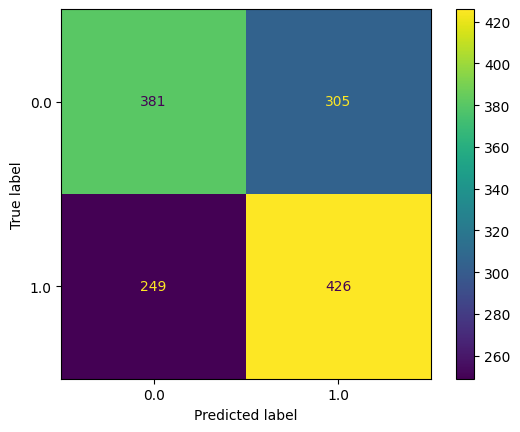

In [75]:
cm = confusion_matrix(y_test,y_pred, labels=eclf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=eclf1.classes_)
disp.plot()
plt.show()